In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Download all data

- [x] `Gene Presence Absence.txt` for **Gene Presence Absence (Rtab)**  
- [x] `FASTA-to-Tabular pan-genome reference.tabular` for **Pan Genome Reference (FASTA)**  
- [x] `emapper.annotations.xlsx` for **EggNOG-mapper Annotation**

In [2]:
roary = pd.read_table('Gene Presence Absence.txt', index_col=0)
roary['summary'] = roary.sum(axis=1)

df = pd.read_table('FASTA-to-Tabular pan-genome reference.tabular',header=None)

KEGG = pd.read_excel('emapper.annotations.xlsx')
KEGG = KEGG[['query','COG_category']]

COG = pd.read_excel('COG one letter code descriptions.xlsx')

In [3]:
#receive information for chosen strains only
RCAM104 = pd.DataFrame(roary.query('summary == 1').query('strain_RCAM104 == 1')['strain_RCAM104'])
RCAM503 = pd.DataFrame(roary.query('summary == 1').query('`GCF_052180175.1` == 1')['GCF_052180175.1'])
both = pd.DataFrame(roary.query('summary == 2').query('`GCF_052180175.1` == 1 & strain_RCAM104 == 1')['summary'])

In [4]:
genes = RCAM104.merge(RCAM503, how='outer', left_index=True, right_index=True)\
                .merge(both, how='outer', left_index=True, right_index=True)\
                .reset_index()['Gene'].to_list()

In [5]:
genes.sort()

In [6]:
#with open("outfile", "w") as outfile:
#    outfile.write("\n".join(genes))

In [7]:
unique_seq = df[df[1].isin(genes)][[1,2]]

In [8]:
unique_seq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 7863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       830 non-null    object
 1   2       830 non-null    object
dtypes: object(2)
memory usage: 19.5+ KB


In [9]:
#unique_seq.to_csv('unique_seq.tabular', sep='\t', index=False)

In [10]:
unique_KEGG = KEGG[KEGG['query'].isin(unique_seq[1])]
unique_KEGG = unique_KEGG.query('COG_category != "-"').reset_index(drop=True)

### COG category analysis

In [11]:
unique_KEGG['COG_category'] = unique_KEGG['COG_category'].str.split('')
unique_KEGG = unique_KEGG.explode('COG_category').query('COG_category != ""').reset_index(drop=True)
unique_KEGG = unique_KEGG.merge(COG, on='COG_category')

In [12]:
plot_df = unique_KEGG.groupby(['function','category'], as_index=False).agg({'COG_category':'count'}).sort_values(by=['COG_category'],ascending=False).reset_index(drop=True)

C:\Users\MCB User\AppData\Local\Temp\ipykernel_7084\2382143499.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")


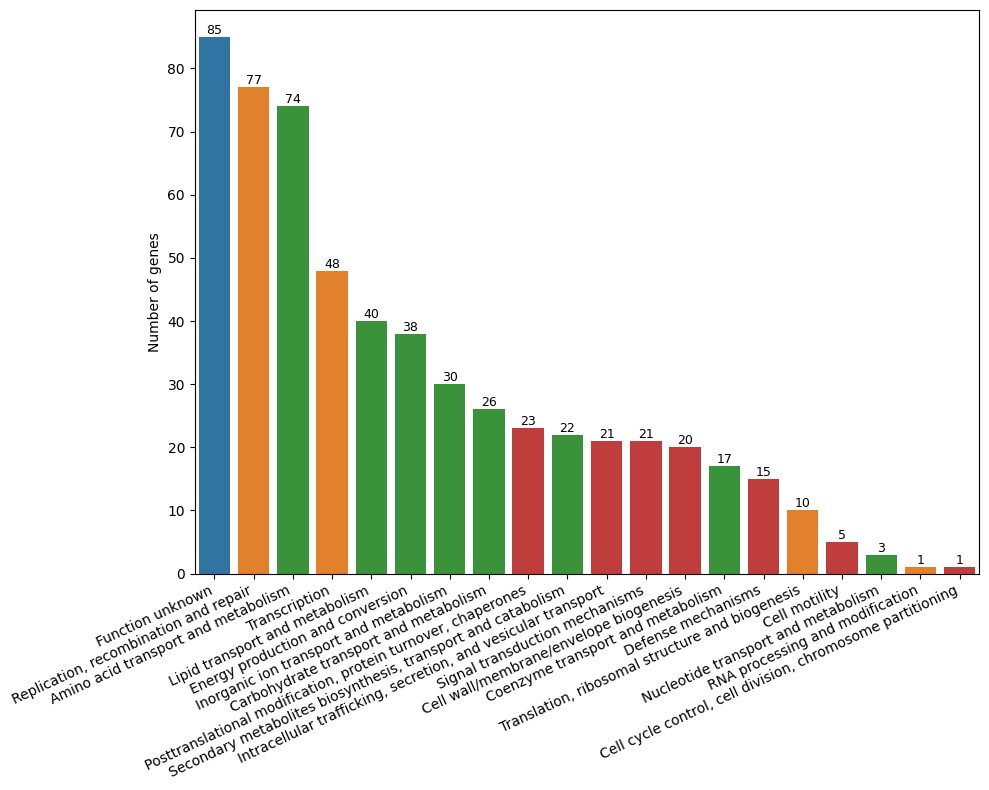

In [13]:
fig = plt.figure(figsize=(10, 8))

ax = sns.barplot(x=plot_df['function'], y=plot_df['COG_category'], hue=plot_df['category'], legend=False, palette="tab10")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',fontsize=9, padding=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.xlabel('')
plt.ylabel('Number of genes')
plt.tight_layout();
#fig.savefig('COGs.png', dpi=600);